In [97]:
import pandas as pd

In [98]:
import seaborn as sns

In [99]:
import numpy as np

In [100]:
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [101]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) #Adjusts the configuration of the plots we will create

In [102]:
#Read in the Data

df = pd.read_csv('/Users/nkechizim/Downloads/movies.csv')

In [103]:
#Let's look at the data
df.head(12)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [104]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [105]:
# Replace missing data for budget and gross with 0 and released with year

df['budget'].fillna(0, inplace = True)
df['gross'].fillna(0, inplace = True)

df['released'].fillna(df['year'], inplace = True)


In [106]:
# Validate Data Types in each column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [107]:
# Change data type of budget and gross columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [108]:
# Create correct year colum

released_split = df['released'].astype('str').str.split("(").str[0]
release_year = released_split.str[-5:]

year_string = df['year'].astype('str')

df['correct_year'] = np.where((release_year == year_string), year_string, release_year)

df['correct_year'] = df['correct_year'].astype('int64')

In [109]:
# Sort data by gross in descending

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
# Drop duplicates

df.drop_duplicates()

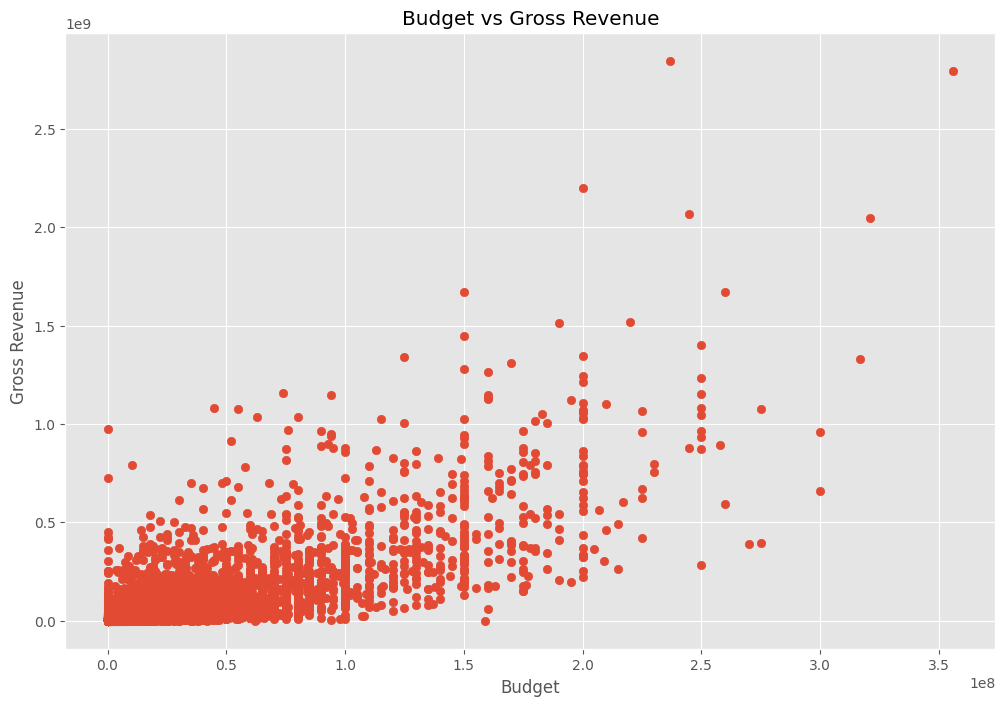

In [113]:
# Budget vs Gross should have high correlation
# Company vs Gross should have high correlation
# Star vs Gross should have high correlation

# Scatter plot with Budget vs Gross Revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')

plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

plt.show()

<AxesSubplot: xlabel='budget', ylabel='gross'>

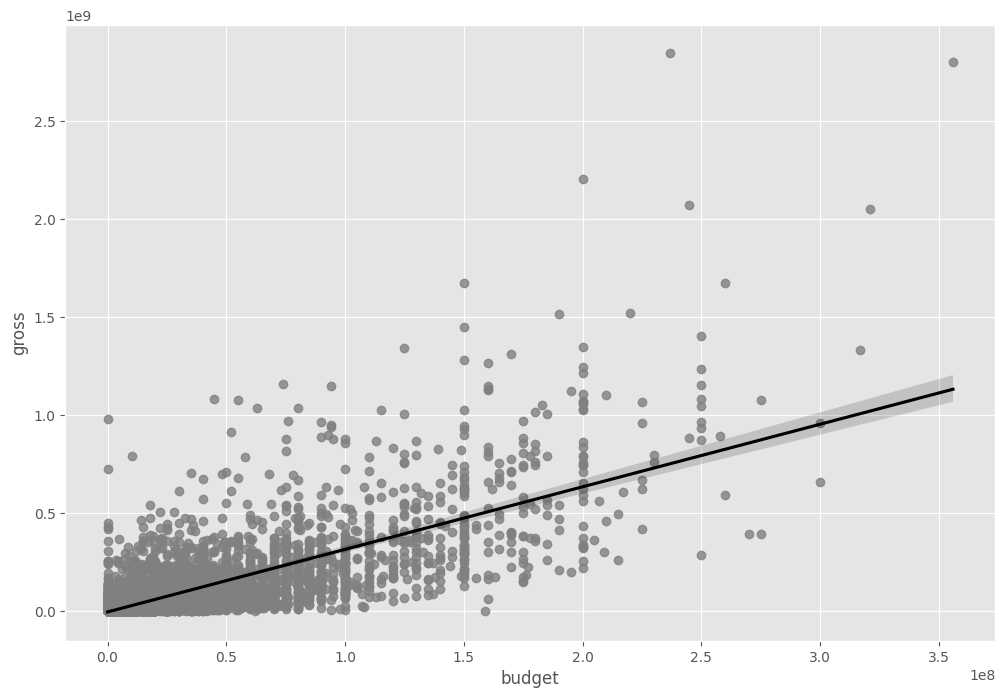

In [115]:
# Plot Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'gray'}, line_kws={'color': 'black'})

In [117]:
# Looking at Correlation

df.corr(numeric_only= True)

# High correlation between budget & gross, groos & votes

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811,0.997416
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451,0.105821
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212,0.218422
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510,0.299876
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235,0.254893
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000,0.120636
correct_year,0.997416,0.105821,0.218422,0.299876,0.254893,0.120636,1.000000


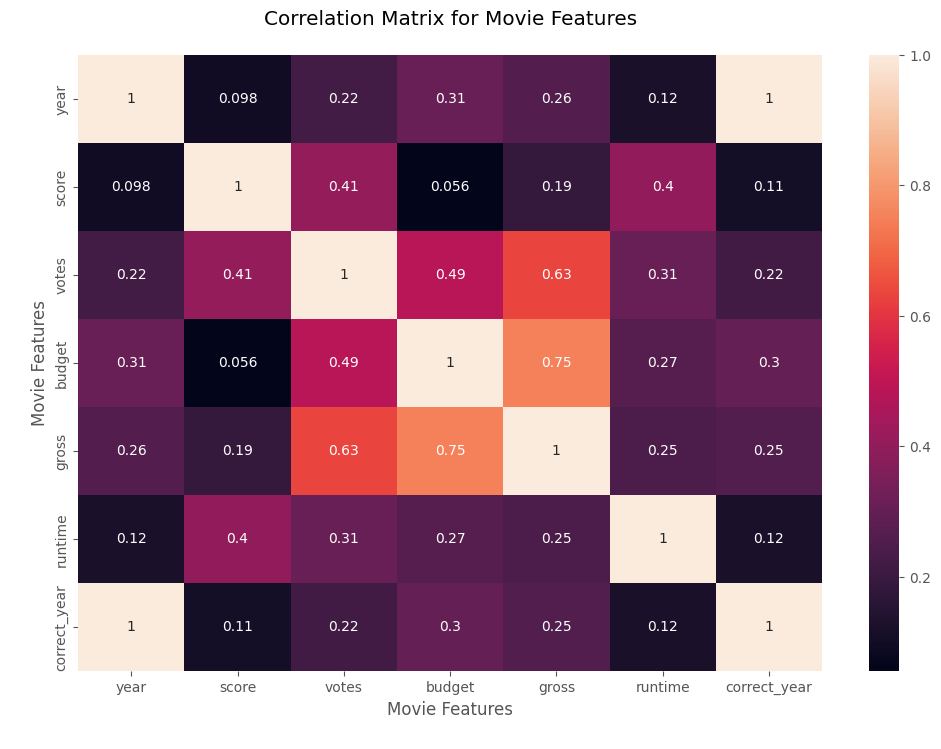

In [119]:
# Correlation Visuals

correlation_matrix = df.corr(numeric_only= True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Movie Features\n')

plt.xlabel('Movie Features\n')
plt.ylabel('\nMovie Features')
plt.show()

In [ ]:
#Numerizing categorical data

# df_numerized = df

# for col_name in df_numerized.columns:
#     if (df_numerized[col_name].dtype == 'object'):
#         df_numerized[col_name] = df_numerized[col_name].astype('category')
#         df_numerized[col_name] = df_numerized[col_name].cat.codes

# df_numerized

In [ ]:
# Correlation Visuals with categorical data

# correlation_mat = df_numerized.corr()

# sns.heatmap(correlation_mat, annot=True)

# plt.title('Correlation Matrix for Movie Features\n')

# plt.xlabel('Movie Features\n')
# plt.ylabel('\nMovie Features')
# plt.show()

In [ ]:
# corr_pairs = correlation_mat.unstack().sort_values()
# corr_pairs[(corr_pairs) > 0.4]